## How to access Hi-C map from .gcmap file?

`.gcmap` is a HDF5 format file.

***

**At first, we import modules:**

* [gcMapExplorer.lib](../apidoc/summary.html)
* [numpy](http://docs.scipy.org/doc/numpy/reference/routines.html) for statistics
* [matplotlib](http://matplotlib.org/gallery.html) for plotting

In [1]:
import gcMapExplorer.lib as gmlib
import numpy as np
import matplotlib.pyplot as plt

# To show inline plots
%matplotlib inline
plt.style.use('ggplot')              # Theme for plotting

#### Load a `.gcmap` file

* At first load a map of chromosome from gcmap file using GCMAP class. 
* Also, load it as ccmap to compare.

In [2]:
#filename = 'cmaps/CooMatrix/rawObserved_100kb.gcmap'
filename = 'normalized/normKR_100kb.gcmap'

# Load through GCMAP class
gcmap = gmlib.gcmap.GCMAP(filename, mapName='chr21')

# Load as a CCMAP class
ccmap = gmlib.gcmap.loadGCMapAsCCMap(filename, mapName='chr21')

**Print some properties of Hi-C data**

In [3]:
for key in gcmap.__dict__:
    print(key, ' : ', gcmap.__dict__[key])

minvalue  :  7.40758559914e-06
resolution  :  100kb
finestResolution  :  100kb
matrix  :  <HDF5 dataset "100kb": shape (482, 482), type "<f4">
binsize  :  100000
xlabel  :  chr21
yticks  :  [0, 48200000]
mapNameList  :  None
bLog  :  False
groupName  :  chr21
fileOpened  :  True
binsizes  :  [100000]
hdf5  :  <HDF5 file "normKR_100kb.gcmap" (mode r+)>
ylabel  :  chr21
bNoData  :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False Fa

***

#### Reading contact map

Contact matrix is available as ``gcmap.matrix`` as similar to that of ``ccmap.matrix``.

In [4]:
print(gcmap.matrix[:])

ccmap.make_readable()
print(ccmap.matrix)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.33700117  0.13242508
   0.0245942 ]
 [ 0.          0.          0.         ...,  0.13242508  0.32248676
   0.10111635]
 [ 0.          0.          0.         ...,  0.0245942   0.10111635
   0.7121914 ]]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.33700117  0.13242508
   0.0245942 ]
 [ 0.          0.          0.         ...,  0.13242508  0.32248676
   0.10111635]
 [ 0.          0.          0.         ...,  0.0245942   0.10111635
   0.7121914 ]]


As can be seen in the above plot, sum of rows/columns are approximately one. It means that the matrix is balanced.

***

### Using numpy modules

Lets plot average and median of each rows using [numpy.mean](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) and [numpy.median](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.median.html).

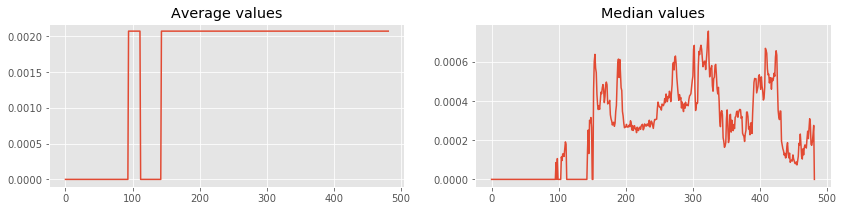

In [5]:
averages = np.mean(gcmap.matrix, axis = 1)            # Calculating mean using numpy.mean
medians = np.median(gcmap.matrix, axis = 0)           # Calculating median using numpy.median

# Plot the values for visual representations
fig = plt.figure(figsize=(14,3))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Average values')                                 # Title first plot
ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Median values')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

# in below both plots, x-axis is index from original matrix to preserve original location
ax1.plot(averages)   # Plot in first axes
ax2.plot(medians)    # Plot in second axes

plt.show()




### Execution Time Comparison between ``np.ndarray``, ``ccmap.matrix`` and ``gcmap.matrix``

In [6]:
cmap = np.asarray( ccmap.matrix[:] )

print('cmap Type:', type(cmap))
print('ccmap Type:', type(ccmap.matrix))
print('gcmap Type:', type(gcmap.matrix))

print(' ')

%timeit np.sum(gcmap.matrix, axis = 0)             # Sum along row using numpy.sum
%timeit np.sum(ccmap.matrix, axis = 0)             # Sum along row using numpy.sum
%timeit np.sum(cmap, axis = 0)             # Sum along row using numpy.sum

print(' ')

%timeit np.sum(gcmap.matrix, axis = 1)             # Sum along column using numpy.sum
%timeit np.sum(ccmap.matrix, axis = 1)             # Sum along column using numpy.sum
%timeit np.sum(cmap, axis = 1)             # Sum along column using numpy.sum

print(' ')

%timeit np.mean(gcmap.matrix, axis = 1)            # Calculating mean using numpy.mean
%timeit np.mean(ccmap.matrix, axis = 1)            # Calculating mean using numpy.mean
%timeit np.mean(cmap, axis = 1)            # Calculating mean using numpy.mean

print(' ')

%timeit np.median(gcmap.matrix, axis = 0)           # Calculating median using numpy.median
%timeit np.median(ccmap.matrix, axis = 0)           # Calculating median using numpy.median
%timeit np.median(cmap, axis = 0)           # Calculating median using numpy.median

del ccmap


cmap Type: <class 'numpy.ndarray'>
ccmap Type: <class 'numpy.core.memmap.memmap'>
gcmap Type: <class 'h5py._hl.dataset.Dataset'>
 
309 µs ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
47.4 µs ± 5.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.3 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
 
328 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
88.1 µs ± 8.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
78.2 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
 
317 µs ± 380 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
90.3 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
81.6 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
 
1.81 ms ± 73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.56 ms ± 91.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.57 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 1000 l

***

#### Whether matrix is balanced after ICE normalization?

In the ICE normalization, if matrix is balanced, sums of rows and coloumns should be equal and variances should be almost equal. In contrast to KR, sums and variances of rows and columns could be extremely large, therefore a direct comparison with KR normalization is impractical. Here, we renormalize IC matrix with sum of rows such that sum of rows and column become equal to one (see line number 9 below). 

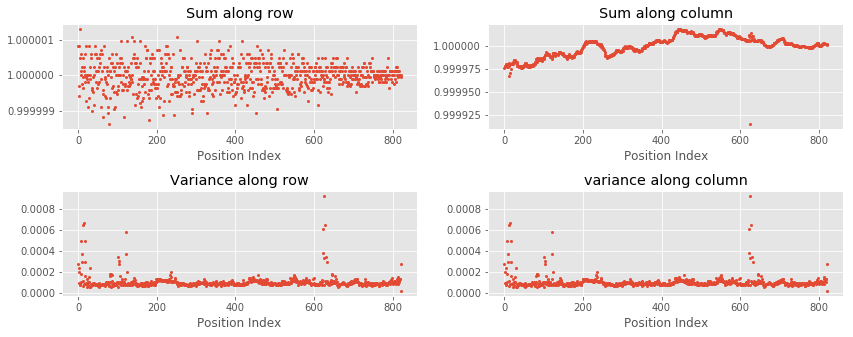

In [7]:
ccmapIC = gmlib.gcmap.loadGCMapAsCCMap('normalized/normIC_100kb.gcmap', mapName='chr15')
ccmapIC.make_readable()
bData = ~ccmapIC.bNoData                          # Stores whther rows/columns has missing data
new_matrix = (ccmapIC.matrix[bData,:])[:,bData]   # Getting new matrix after removing rows/columns of missing data


# Renormalize ICE matrix with sum of rows so that sum of rows become one
# It is neccessary to compare with the KR normalization 
new_matrix = new_matrix / np.sum(new_matrix, axis = 1)

r_sum = np.sum(new_matrix, axis = 0)             # Sum along row using numpy.sum
r_var = np.var(new_matrix, axis = 0)             # Variance along row using numpy.var

c_sum = np.sum(new_matrix, axis = 1)             # Sum along column using numpy.sum
c_var = np.var(new_matrix, axis = 1)             # Variance along column using numpy.var

# Plot the values for visual representations
fig = plt.figure(figsize=(14,5))                               # Figure size
fig.subplots_adjust(hspace=0.6)                                # Space between plots

ax1 = fig.add_subplot(2,2,1)                                   # Axes first plot
ax1.set_title('Sum along row')                                 # Title first plot
ax1.set_xlabel('Position Index')                               # X-label

ax2 = fig.add_subplot(2,2,2)                                   # Axes second plot
ax2.set_title('Sum along column')
ax2.set_xlabel('Position Index')

ax3 = fig.add_subplot(2,2,3)                                   # Axes third plot
ax3.set_title('Variance along row')                            
ax3.set_xlabel('Position Index')                              

ax4 = fig.add_subplot(2,2,4)                                   # Axes fourth plot                                   
ax4.set_title('variance along column')
ax4.set_xlabel('Position Index')

ax1.plot(r_sum, marker='o', lw=0, ms=2)                        # Plot in first axes
ax2.plot(c_sum, marker='o', lw=0, ms=2)                        # Plot in second axes
ax3.plot(r_var, marker='o', lw=0, ms=2)                        # Plot in third axes
ax4.plot(c_var, marker='o', lw=0, ms=2)                        # Plot in fourth axesL

ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting
ax2.get_yaxis().get_major_formatter().set_useOffset(False)
ax3.get_yaxis().get_major_formatter().set_useOffset(False)     
ax4.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()

del ccmapIC                # Remove temporary files

**Result**

As can be seen in the above plots, sums of rows and columns are equal to one. Additionally, variances of rows and columns are also almost equal.